In [44]:
from datasets import load_dataset, concatenate_datasets

# load datasets
sts12 = load_dataset("mteb/sts12-sts")
sts13 = load_dataset("mteb/sts13-sts")
sts14 = load_dataset("mteb/sts14-sts")
sts15 = load_dataset("mteb/sts15-sts")
sts16 = load_dataset("mteb/sts16-sts")
stsb = load_dataset("mteb/stsbenchmark-sts")
sickr = load_dataset("mteb/sickr-sts")

Found cached dataset json (/Users/konstantinspiess/.cache/huggingface/datasets/mteb___json/mteb--sts12-sts-9e940368cad86377/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)
100%|██████████| 2/2 [00:00<00:00, 947.01it/s]
Found cached dataset json (/Users/konstantinspiess/.cache/huggingface/datasets/mteb___json/mteb--sts13-sts-a3d8d9f11c3fb4fb/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)
100%|██████████| 1/1 [00:00<00:00, 657.93it/s]
Found cached dataset json (/Users/konstantinspiess/.cache/huggingface/datasets/mteb___json/mteb--sts14-sts-89b1844e26625a7b/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)
100%|██████████| 1/1 [00:00<00:00, 609.02it/s]
Found cached dataset json (/Users/konstantinspiess/.cache/huggingface/datasets/mteb___json/mteb--sts15-sts-cc7ec6c601ba9275/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)
100%|██████████| 1/1 [00:00<00:00, 434.24it/s]
Found cached dataset json (/

In [45]:
# combine datasets
sts12_train = sts12["train"]
sts12_test = sts12["test"]
sts13_test = sts13["test"]
sts14_test = sts14["test"]
sts15_test = sts15["test"]
sts16_test = sts16["test"]
stsb_train = stsb["train"]
stsb_validation = stsb["validation"]
stsb_test = stsb["test"]
sickr_test = sickr["test"]



# dataset = concatenate_datasets([sts12_train, sts12_test, sts13_test, sts14_test, sts15_test, sts16_test, stsb_train, stsb_validation, stsb_test, sickr_test])

dataset = concatenate_datasets([sts12_test, sts13_test, sts14_test, sts15_test, sts16_test, stsb_test, sickr_test])

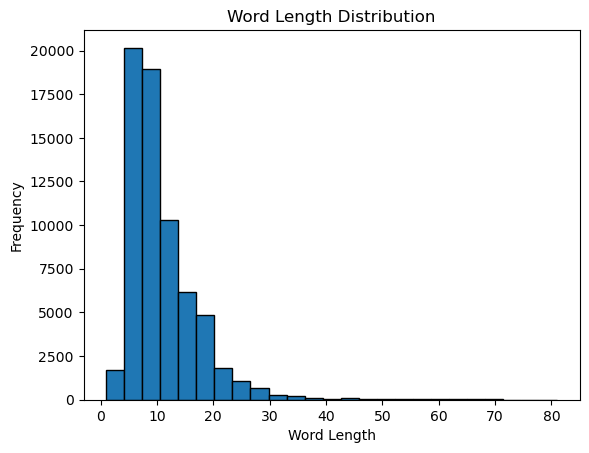

In [46]:
import matplotlib.pyplot as plt

word_length = []
for sample in dataset:
    word_length.append(len(sample["sentence1"].split()))
    word_length.append(len(sample["sentence2"].split()))

plt.hist(word_length, bins=25, edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Word Length Distribution')
plt.show()

In [7]:
sentences1 = dataset["sentence1"]
sentences2 = dataset["sentence2"]

['the problem likely will mean corrective changes before the shuttle fleet starts flying again .', 'the technology-laced nasdaq composite index .ixic inched down 1 point , or 0.11 percent , to 1,650 .', '" it \'s a huge black eye , " said publisher arthur ochs sulzberger jr . , whose family has controlled the paper since 1896 .', 'sec chairman william donaldson said there is a " building confidence out there that the cop is on the beat . "', 'vivendi shares closed 1.9 percent at 15.80 euros in paris after falling 3.6 percent on monday .', "myanmar 's pro-democracy leader aung san suu kyi will return home late friday but will remain in detention after recovering from surgery at a yangon hospital , her personal physician said .", 'darren dopp , a spitzer spokesman , declined to comment late thursday .', 'bremer said one initiative is to launch a us $ 70 million nationwide program in the next two weeks to clean up neighborhoods and build community projects .', "in afternoon trading in eur

In [11]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

sentences1 = dataset["sentence1"]
sentences2 = dataset["sentence2"]

#Encode all sentences
embeddings1 = model.encode(sentences1)
embeddings2 = model.encode(sentences2)


In [30]:
cos_sim = []

for i in range(len(sentences1)):
    cos_sim.append(util.cos_sim(embeddings1[i], embeddings2[i])[0][0])

In [50]:
from  sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from sentence_transformers import InputExample

test_samples = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8:[], 9:[]}
for row in dataset:
  bucket = 9
  if(len(row["sentence1"]) < 10):
    bucket = 1
  elif(len(row["sentence1"]) < 20):
    bucket = 2
  elif(len(row["sentence1"]) < 30):
    bucket = 3
  elif(len(row["sentence1"]) < 40):
    bucket = 4
  elif(len(row["sentence1"]) < 50):
    bucket = 5
  elif(len(row["sentence1"]) < 60):
    bucket = 6
  elif(len(row["sentence1"]) < 70):
    bucket = 7
  elif(len(row["sentence1"]) < 80):
    bucket = 8

  score = float(row['score']) / 5.0
  test_samples[bucket].append(InputExample(texts=[row['sentence1'], row['sentence2']], label=score))

test_evaluator_1 = EmbeddingSimilarityEvaluator.from_input_examples(test_samples[1], name='sts-test-1')
test_evaluator_2 = EmbeddingSimilarityEvaluator.from_input_examples(test_samples[2], name='sts-test-2')
test_evaluator_3 = EmbeddingSimilarityEvaluator.from_input_examples(test_samples[3], name='sts-test-3')
test_evaluator_4 = EmbeddingSimilarityEvaluator.from_input_examples(test_samples[4], name='sts-test-4')
test_evaluator_5 = EmbeddingSimilarityEvaluator.from_input_examples(test_samples[5], name='sts-test-5')
test_evaluator_6 = EmbeddingSimilarityEvaluator.from_input_examples(test_samples[6], name='sts-test-6')
test_evaluator_7 = EmbeddingSimilarityEvaluator.from_input_examples(test_samples[7], name='sts-test-7')
test_evaluator_8 = EmbeddingSimilarityEvaluator.from_input_examples(test_samples[8], name='sts-test-8')
test_evaluator_9 = EmbeddingSimilarityEvaluator.from_input_examples(test_samples[9], name='sts-test-9')

test_evaluator_1(model, output_path="./result/")
test_evaluator_2(model, output_path="./result/")
test_evaluator_3(model, output_path="./result/")
test_evaluator_4(model, output_path="./result/")
test_evaluator_5(model, output_path="./result/")
test_evaluator_6(model, output_path="./result/")
test_evaluator_7(model, output_path="./result/")
test_evaluator_8(model, output_path="./result/")
test_evaluator_9(model, output_path="./result/")


0.7142688201863948